# **SALES PREDICTION USING PYTHON**

Step 1:- Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import polars as pl
from summarytools import dfSummary
from skimpy import skim

Step 2 :- Loading The Dataset

In [4]:
data = pd.read_csv("advertising (2).csv")

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


Step 3:- Summary of data and Basic Checks

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
data.shape

(200, 4)

Step 4 : - EDA

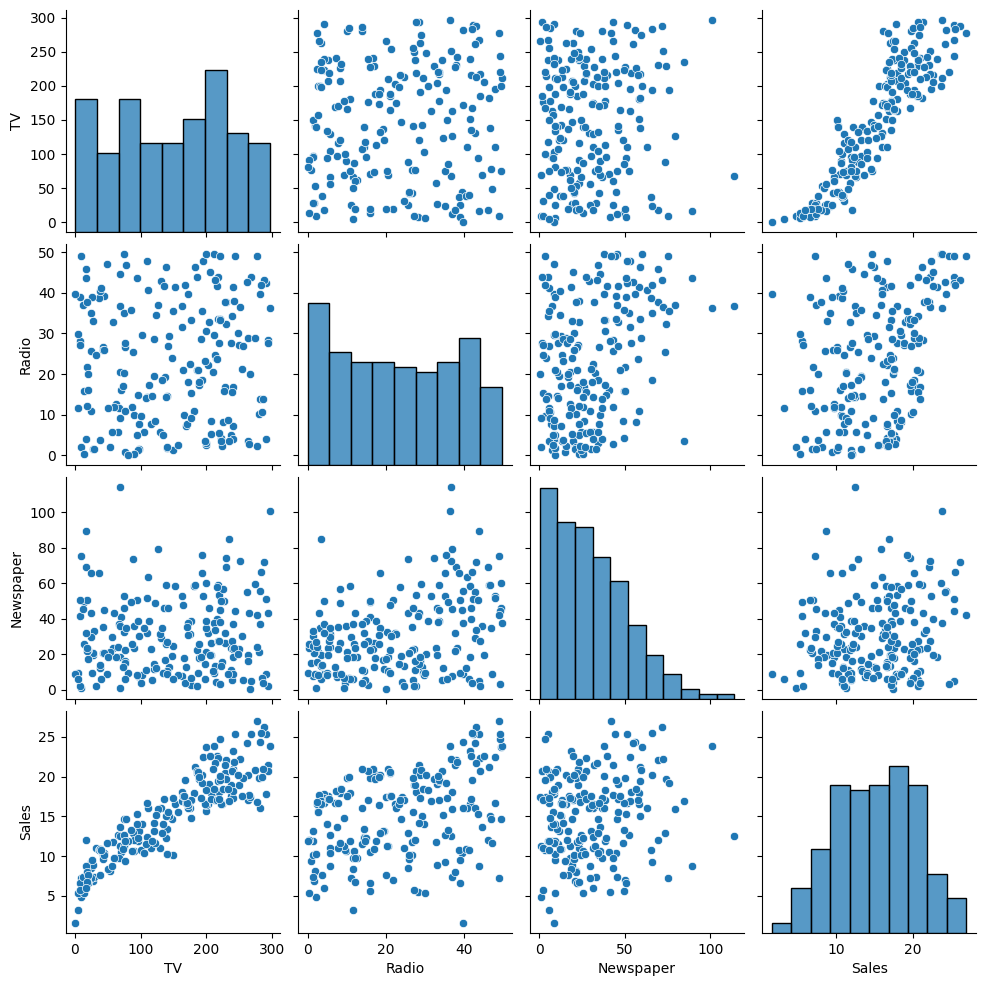

In [11]:
sns.pairplot(data)

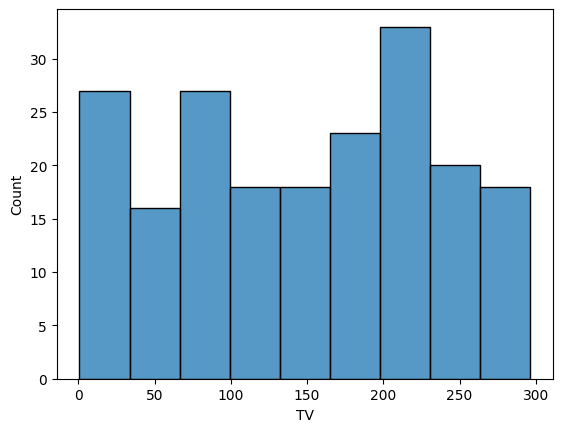

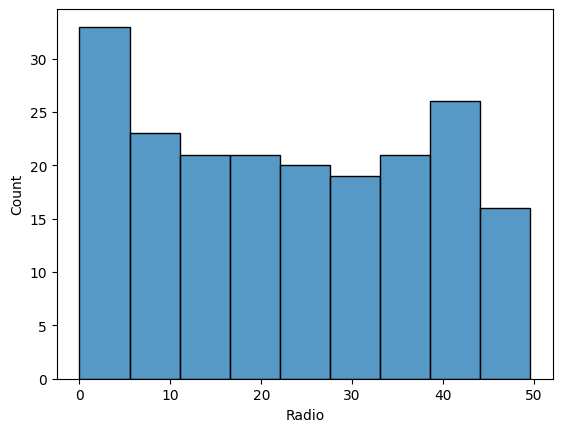

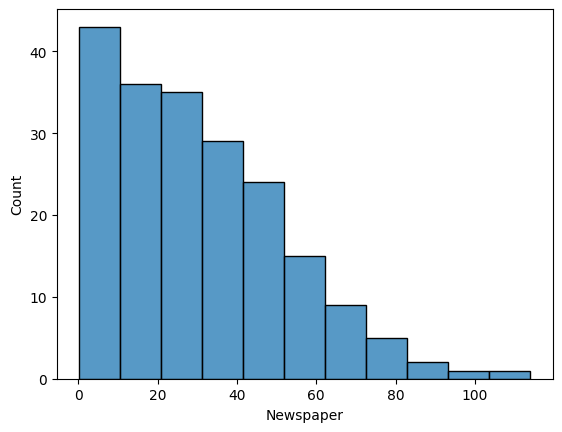

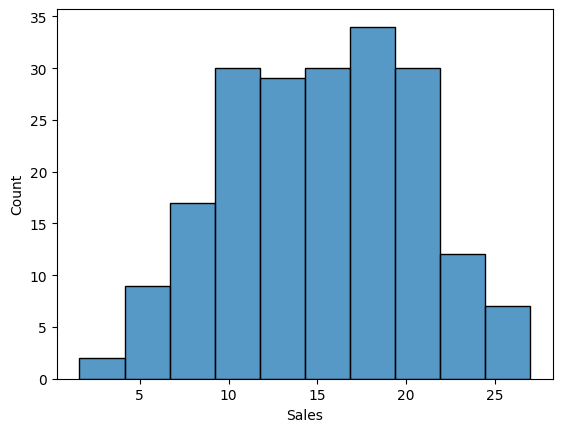

In [12]:
for i in data.columns:
  sns.histplot(data[i])
  plt.show()

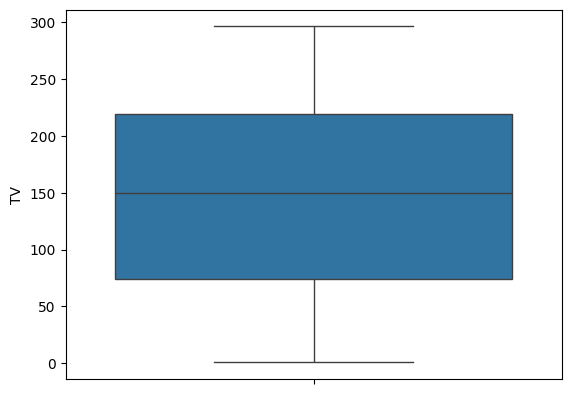

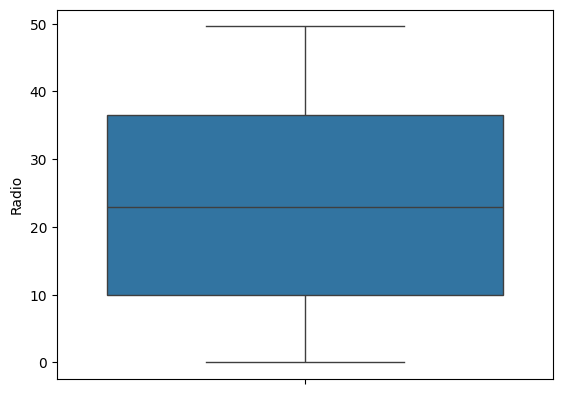

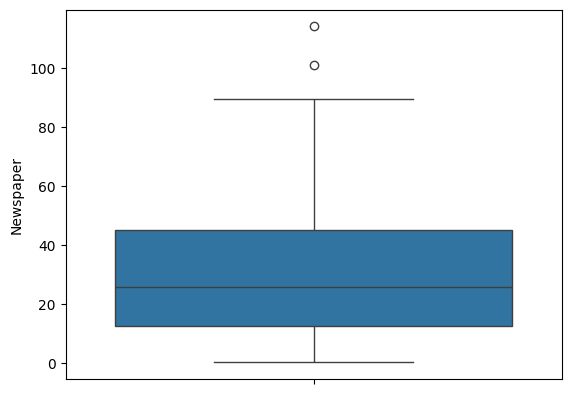

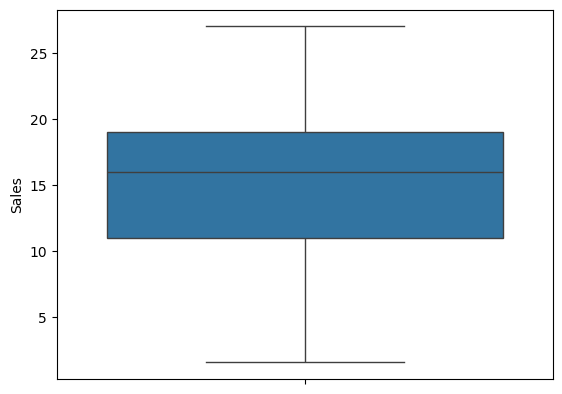

In [13]:
for i in data.columns:
  sns.boxplot(data[i])
  plt.show()

In [14]:
# Newspaper have some outlier

# Data Preprocessing

In [15]:
# Handling the outlier
q1 = data["Newspaper"].quantile(0.25)
q3 = data["Newspaper"].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
data = data[(data["Newspaper"] >= lower_limit) & (data["Newspaper"] <= upper_limit)]

<Axes: >

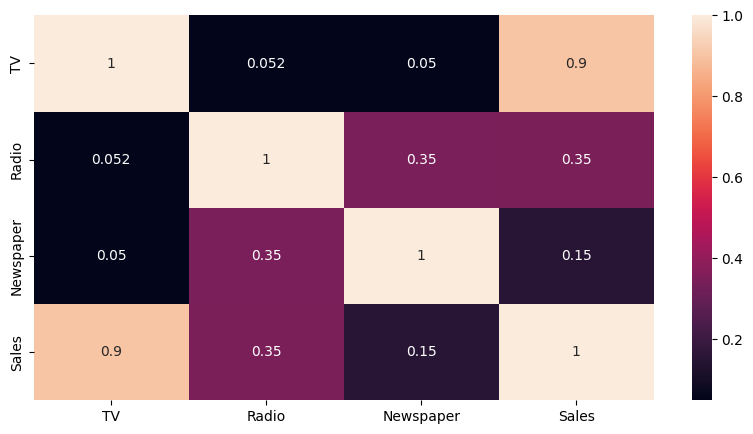

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [17]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [18]:
data.shape

(198, 4)

# Model Building and Evaluation

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [20]:
x=data.drop("Sales",axis=1)
y=data["Sales"]

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2,random_state=2)

In [22]:
#Creating model
LR=LinearRegression() # object creation

LR.fit(x_train,y_train) # training of linear regression

y_predict_test=LR.predict(x_test) # testing of linear regression

In [23]:
y_predict_train = LR.predict(x_train)

y_train # actual output for training data

y_predict_train # predicted output for training data

y_test # actual output for test data

y_predict_test # model predicted output for test data

In [24]:
# Evaluating the performance of trained algos
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('The performance evaluation of Linear Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test,y_predict_test))
print('Mean absolute error: ',mean_absolute_error(y_test, y_predict_test))
print('R2 score: ',r2_score(y_test, y_predict_test))

The performance evaluation of Linear Regression is below:  

Mean squared error:  3.7968990503909366
Mean absolute error:  1.4090458020037204
R2 score:  0.8507302504933119


In [25]:
#Adjusted R2 score of test data
x_test.shape

(40, 3)

In [26]:
Adjusted_r2_score= 1-(1-0.85)*((40-1)/(40-3-1))
Adjusted_r2_score

0.8375

In [27]:
# Adjusted R2 score of Train data
x_train.shape

(158, 3)

In [28]:
Adjusted_r2_score= 1-(1-0.85)*((158-1)/(158-3-1))
Adjusted_r2_score

0.8470779220779221

In [29]:
RFR= RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)
RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

In [30]:
print('Mean squared error: ',mean_squared_error(y_test, rf_preds))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_preds))
print('R2 score: ',r2_score(y_test, rf_preds))

Mean squared error:  1.9276785999999966
Mean absolute error:  1.0269
R2 score:  0.9242160252530875


In [31]:
#Adjusted r2score of test data
Adjusted_r2_score= 1-(1-0.92)*((40-1)/(40-3-1))
Adjusted_r2_score

0.9133333333333333

In [32]:
 # Adjusted r2score of train data
Adjusted_r2_score= 1-(1-0.92)*((158-1)/(158-3-1))
Adjusted_r2_score

0.9184415584415585

# Model Testing with a new Dataframe

In [33]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [34]:
# Creating a new dataframe with values
data = {"TV" : [283], "Radio" : [55], "Newspaper" : [78]}
df = pd.DataFrame(data)

In [35]:
# Predict the movie rating
predicted_rating = RFR.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 25.896000000000004
